In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./data-analysis-test-data.csv')

### Información descriptiva de las variables del problema:

- Meses de suscripción: Antiguedad del cliente en meses
- Fuga: Variable cuantitativa discreta (booleana): 1 -> el cliente eliminó la cuenta en los 30 días posteriores. 0 el cliente continua suscripto
- IS: indice de satisfacción del cliente respecto al servicio
- Nro de casos de soporte: Cantidad de veces que el cliente se contactó con servicio técnico y fue atendido
- Variación en los últimos 30 días del número de casos de soporte observados en el último mes
- Prioridad del soporte: Grado promedio de gravedad del soporte y solicitud del soporte
- Variación de la prioridad del soporte: Variación en los últimos 30 días de la gravedad promedio de la solicitud de soporte
- Var nro logins: Variación en los últimos 30 días del número de veces que un cliente se conectó al servicio
- Var uso del servicio: Variación en los últimos 30 días del número de veces que el cliente utilizó el servicio
- Var. Exposición del producto del Cliente: Variación en los últimos 30 días de la exposición del producto que tuvo el cliente por utilizar el servicio (cuánta gente vio su producto)
- Variación en los últimos 30 días del número de días desde su última conexión

### Objetivo

Dado que el core business de ECOMM es la suscripción a su producto, el objetivo buscado será minimizar la cantidad de bajas en la suscripción y maximizar los potenciales clientes que todavía no consumen el servicio.

### Preguntas
- ¿El precio de la suscripción aumenta respecto al tamaño de la compañia del cliente?
- ¿Qué relación tiene la suscripción respecto al ingreso del cliente?
- ¿Como se mide el grado de utilización de este producto? Más allá de la satisfacción percibida del lado del cliente, hay alguna variable que indique que tan útil es el producto para el revenue del cliente?
- ¿Cómo se mide el indice de satsifacción? ¿Razón de ser de la escala?

### Sample de bajas a la suscripción

In [68]:
df[df['Fuga'] == 1].head()

,ID,Meses de suscripción,Fuga,Índice de Satisfacción (IS),Var. del IS,Nro. de Casos de Soporte,Var. Nro. de Casos de Soporte,Prioridad del Soporte,Var. de la Prioridad del Soporte,Var. Nro. Logins,Var. Uso del Servicio,Var. Beneficio para el Cliente,Var. Días desde Ult. Conexión
19,20,94,1,0,-52,0,0,0.0,0.0,-14,0,0,-53
21,22,26,1,244,62,12,8,3.0,0.0,188,8,-2,-9
90,91,28,1,52,-2,0,0,0.0,0.0,8,0,-20,-3
98,99,24,1,0,0,0,0,0.0,0.0,0,0,0,31
104,105,26,1,294,2,4,4,3.0,3.0,48,0,-428,-1


In [9]:
df.sample(3)

,ID,Meses de suscripción,Fuga,Índice de Satisfacción (IS),Var. del IS,Nro. de Casos de Soporte,Var. Nro. de Casos de Soporte,Prioridad del Soporte,Var. de la Prioridad del Soporte,Var. Nro. Logins,Var. Uso del Servicio,Var. Beneficio para el Cliente,Var. Días desde Ult. Conexión
1400,1401,6,0,6,6,0,0,0.000000,0.000000,12,0,0,0
799,800,36,0,256,40,0,0,0.000000,0.000000,12,0,-60,20
1319,1320,16,0,184,84,6,4,2.666667,-0.333333,30,0,0,5


In [12]:
numeric_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

### Variables numéricas y categóricas

<AxesSubplot: >

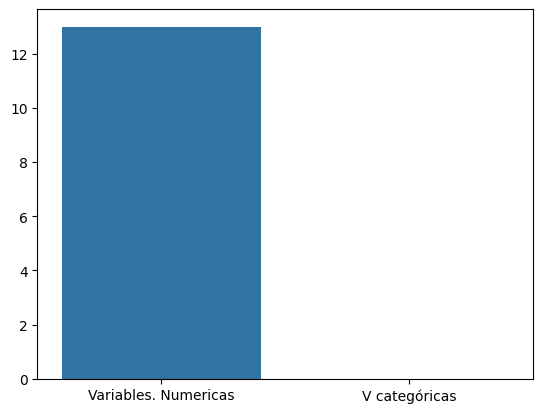

In [13]:
sns.barplot(x=['Variables. Numericas','V categóricas'],y=[len(numeric_features),len(categorical_features)])

> Al tratarte 100% de variables numéricas, no nos tendremos que preocupar por un Encoding de los datos. Lo que tendrémos que tener en cuenta a futuro, es la escala en la que trabajaremos las variables numéricas y deberemos normalizarlas para no sesgar nuestro análisis.

### Valores Nulos & Na

In [16]:
df.isnull().sum()

ID                                  0
Meses de suscripción                0
Fuga                                0
Índice de Satisfacción (IS)         0
Var. del IS                         0
Nro. de Casos de Soporte            0
Var. Nro. de Casos de Soporte       0
Prioridad del Soporte               0
Var. de la Prioridad del Soporte    0
Var. Nro. Logins                    0
Var. Uso del Servicio               0
Var. Beneficio para el Cliente      0
Var. Días desde Ult. Conexión       0
dtype: int64

In [17]:
df.isna().sum()

ID                                  0
Meses de suscripción                0
Fuga                                0
Índice de Satisfacción (IS)         0
Var. del IS                         0
Nro. de Casos de Soporte            0
Var. Nro. de Casos de Soporte       0
Prioridad del Soporte               0
Var. de la Prioridad del Soporte    0
Var. Nro. Logins                    0
Var. Uso del Servicio               0
Var. Beneficio para el Cliente      0
Var. Días desde Ult. Conexión       0
dtype: int64

Al no tener valores Nulos ni Na no tenemos que aplicar ninguna técnica de reemplazo por alguna medida de tendencia central

## Fuga
Haremos un análisis descriptivo para evaluar la fuga del cliente respecto a los features provistos.

### Porcentaje de NO fuga (suscriptores)

In [160]:
total_registros = len(df)
fugas_uno = df[df['Fuga'] == 1]
fugas_cero = df[df['Fuga'] == 0]
# Contar la cantidad de registros con Fuga igual a 0

porcentaje_fugas_cero = (len(fugas_cero) / total_registros) * 100
print(f"Porcentaje de Fuga igual a 0 sobre el total de registros: {porcentaje_fugas_cero:.2f}%")

Porcentaje de Fuga igual a 0 sobre el total de registros: 95.28%


Con esto en mente, vemos que el 95.28% de los usuarios, actualmente, son activos.

### Baja de suscripción en el mes 0

In [149]:
fugas_en_mes_cero_o_uno = df[(df['Fuga'] == 1) & ((df['Meses de suscripción'] == 0) | (df['Meses de suscripción'] == 1))] 
len(fugas_en_mes_cero_o_uno)


0

### Fuga respecto a a los meses de suscripción

/usr/local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Figure size 1000x600 with 0 Axes>

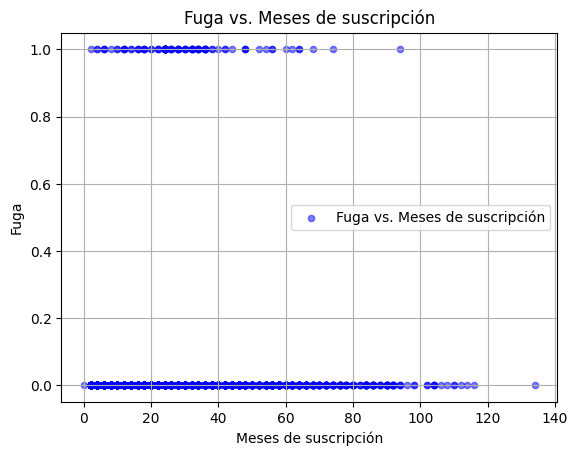

In [150]:
plt.figure(figsize=(10, 6))
df.plot.scatter(x='Meses de suscripción', y='Fuga', c='blue', marker='o', alpha=0.5, label='Fuga vs. Meses de suscripción')
plt.title('Fuga vs. Meses de suscripción')
plt.xlabel('Meses de suscripción')
plt.ylabel('Fuga')
plt.legend()
plt.grid(True)
plt.show()

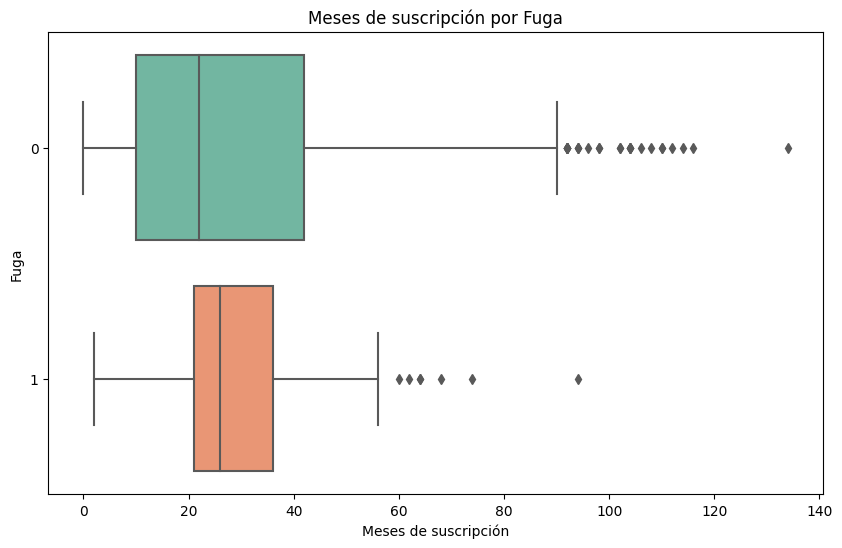

In [139]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meses de suscripción', y='Fuga', data=df, orient='h', palette='Set2')
plt.title('Meses de suscripción por Fuga')
plt.xlabel('Meses de suscripción')
plt.ylabel('Fuga')
plt.show()


> En un principio, esta variable no es explicativa en cuanto al comportamiento del usuario

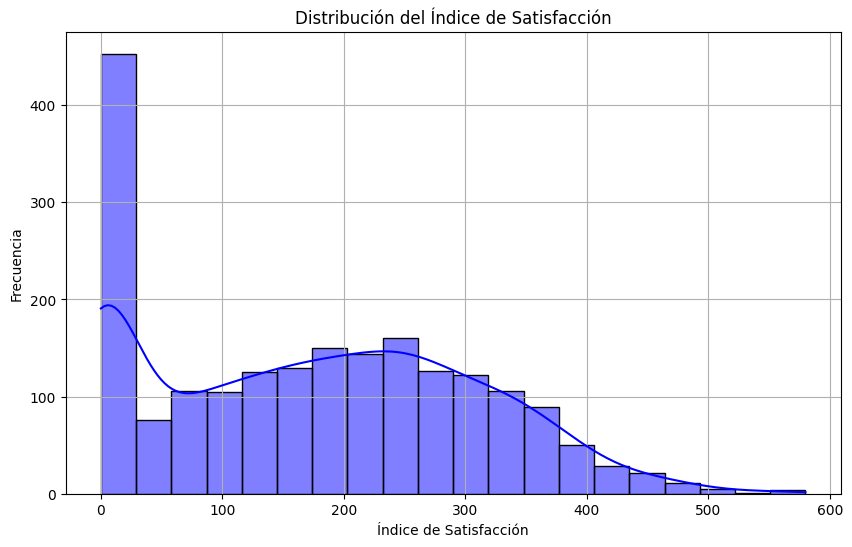

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Índice de Satisfacción (IS)'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribución del Índice de Satisfacción')
plt.xlabel('Índice de Satisfacción')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


A simple vista puede notarse que hay gran concentración con bajo indice de satisfacción por el producto.

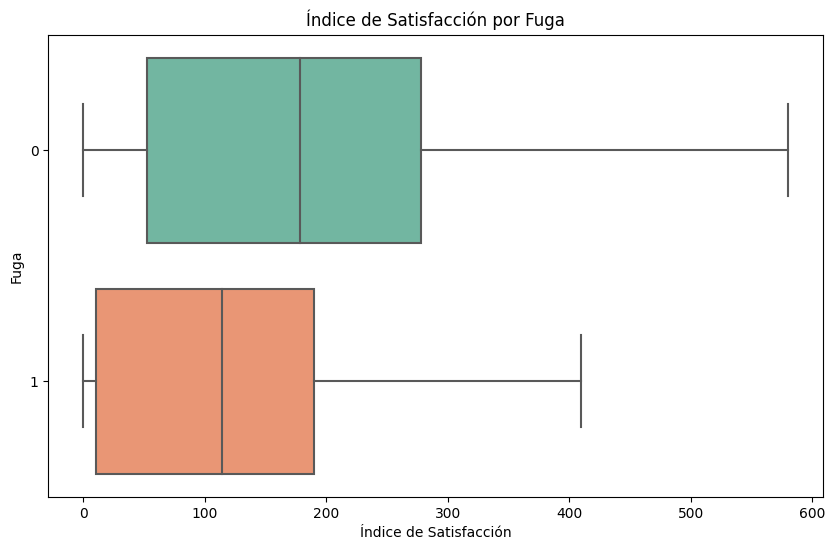

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Índice de Satisfacción (IS)', y='Fuga', data=df, orient='h', palette='Set2')
plt.title('Índice de Satisfacción por Fuga')
plt.xlabel('Índice de Satisfacción')
plt.ylabel('Fuga')
plt.show()


Basado en los datos, se ve que las personas que dan de baja el servicio, en todo el espectro de percentiles, tiene un grado de satisfacción más bajo por el producto.

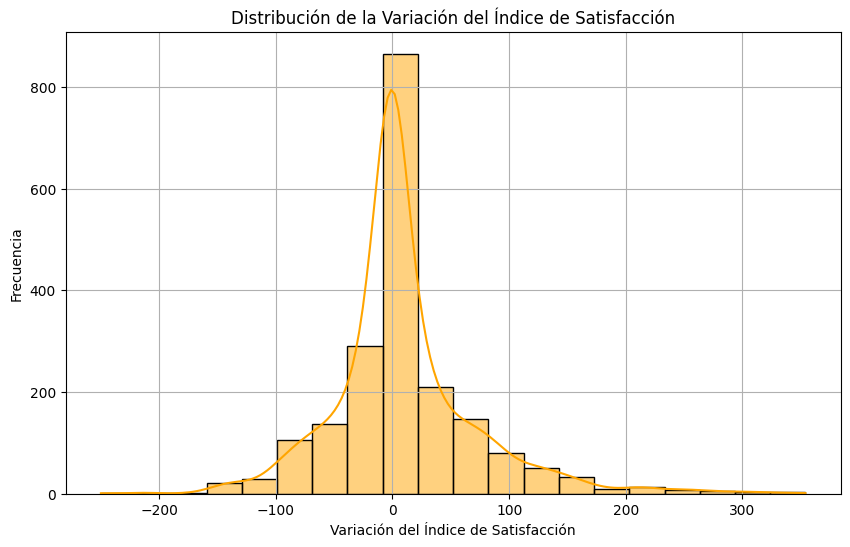

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Var. del IS'], bins=20, kde=True, color='orange', edgecolor='black')
plt.title('Distribución de la Variación del Índice de Satisfacción')
plt.xlabel('Variación del Índice de Satisfacción')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


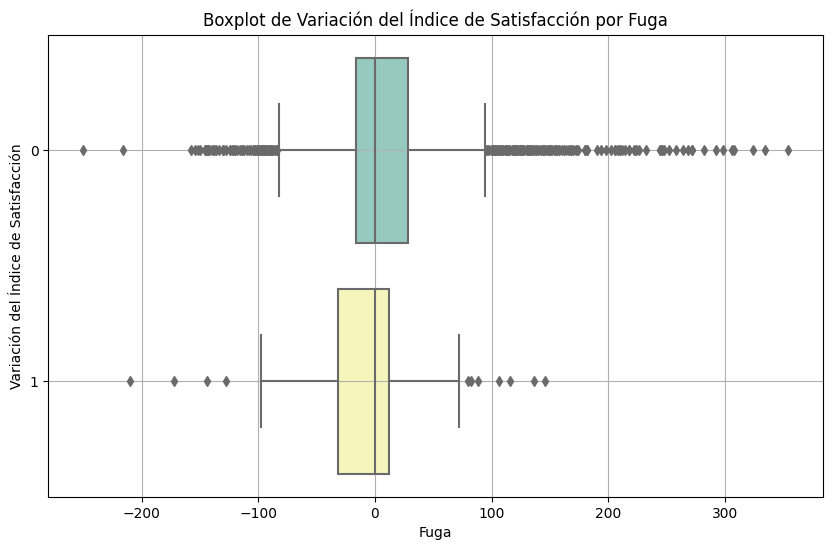

In [154]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Fuga', x='Var. del IS',orient='h' , data=df, palette='Set3')
plt.title('Boxplot de Variación del Índice de Satisfacción por Fuga')
plt.xlabel('Fuga')
plt.ylabel('Variación del Índice de Satisfacción')
plt.grid(True)
plt.show()

La mediana es 0, es decir, tenemos una concentración de casos en los que el IS no varia. Por otra parte, las personas que se desuscribieron, el último mes experimentaron un mayor grado de insatisfacción por el producto. Deberíamos evaluar como esta variable se relaciona con otras para entender porque tuvieron mayor grado de insatisfacción el último mes.

### Fuga y casos de soporte

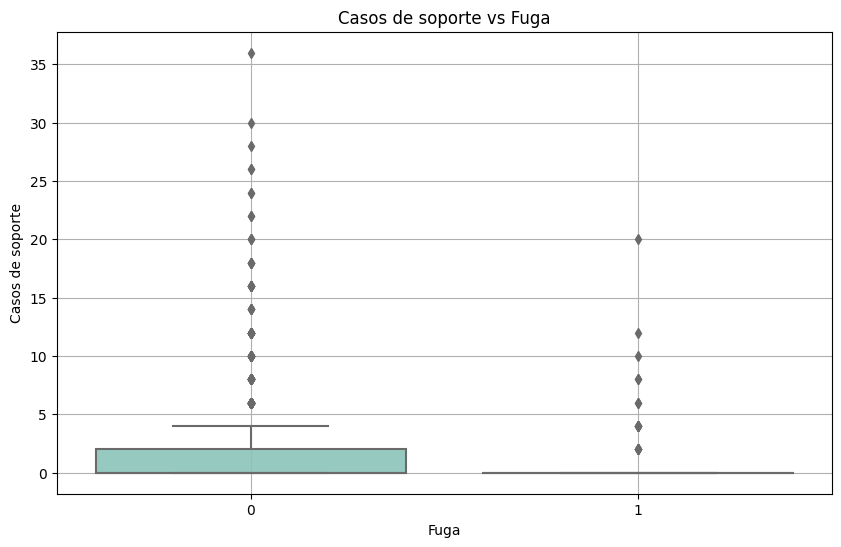

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuga', y='Nro. de Casos de Soporte' , data=df, palette='Set3')
plt.title('Casos de soporte vs Fuga')
plt.xlabel('Fuga')
plt.ylabel('Casos de soporte')
plt.grid(True)
plt.show()

Análisis de casos de Login respecto a la desuscripción del cliente

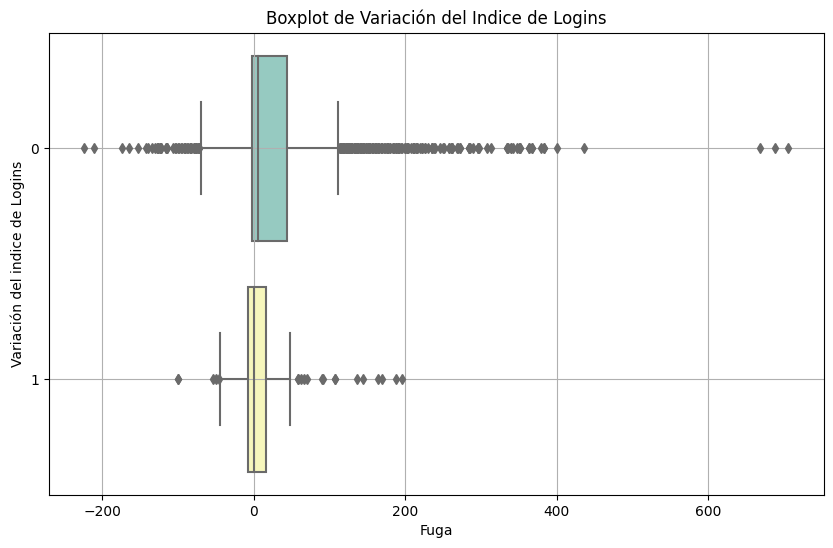

In [116]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Var. Nro. Logins', y='Fuga', orient='h',data=df, palette='Set3')
plt.title('Boxplot de Variación del Indice de Logins')
plt.xlabel('Fuga')
plt.ylabel('Variación del indice de Logins')
plt.grid(True)
plt.show()

In [141]:
logins_y_fuga = df[df['Fuga'] == 1]

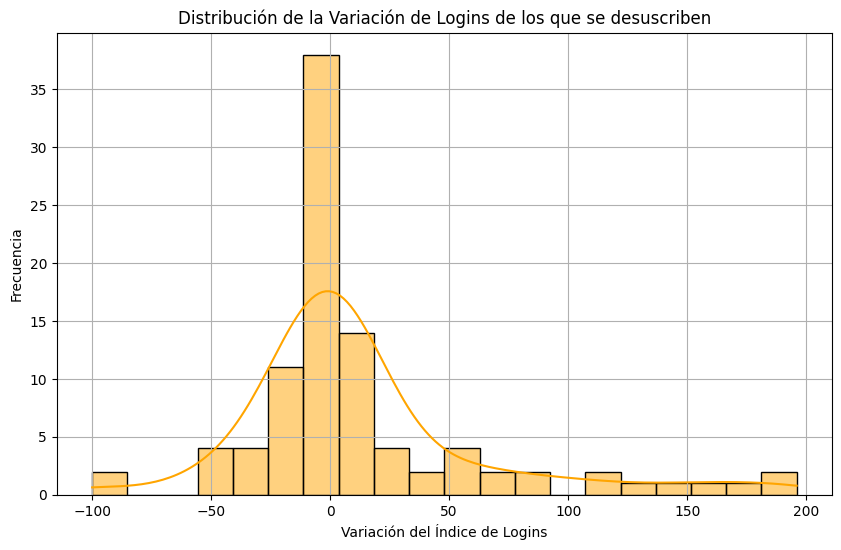

In [153]:
plt.figure(figsize=(10, 6))
sns.histplot(fugas_uno['Var. Nro. Logins'], bins=20, kde=True, color='orange', edgecolor='black')
plt.title('Distribución de la Variación de Logins de los que se desuscriben')
plt.xlabel('Variación del Índice de Logins')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

> Las personas que se desuscriben vemos que no se conectan tan seguido como las personas que se mantienen como clientes. Puede ser que no entiendan la herramienta o que no le vean la utilidad respecto a su negocio.

### Fuga y Variabilidad días respecto última conexion

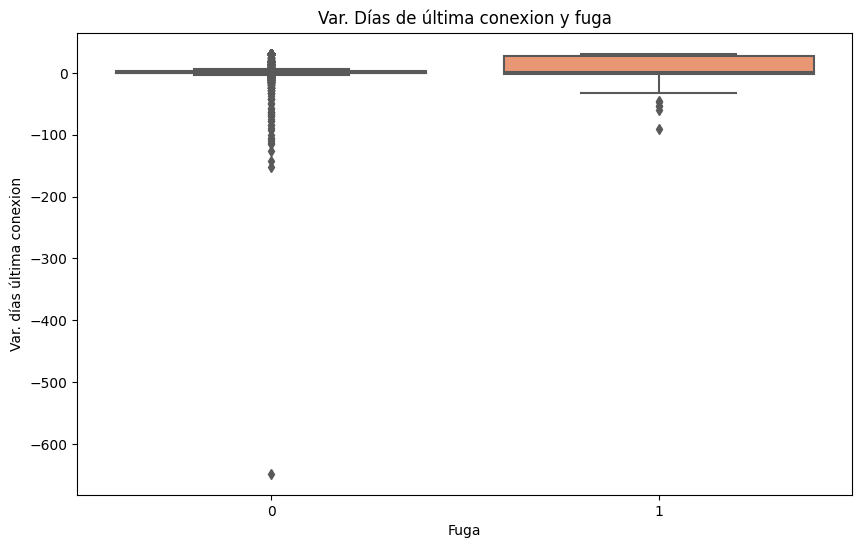

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuga', y='Var. Días desde Ult. Conexión', data=df, palette='Set2')
plt.title('Var. Días de última conexion y fuga')
plt.xlabel('Fuga')
plt.ylabel('Var. días última conexion')
plt.show()


> Observamos que las personas que se desuscriben tienen un gap mayor de días sin conectarse al sistema. Todavía no entendemos por qué. Puede ser porque no entienden como funciona o pueden ser empresas que no tienen implementado un proceso de gestión y por lo tanto no usan el sistema.

### Var. Uso del servicio (exposición) para el Cliente respecto a la fuga

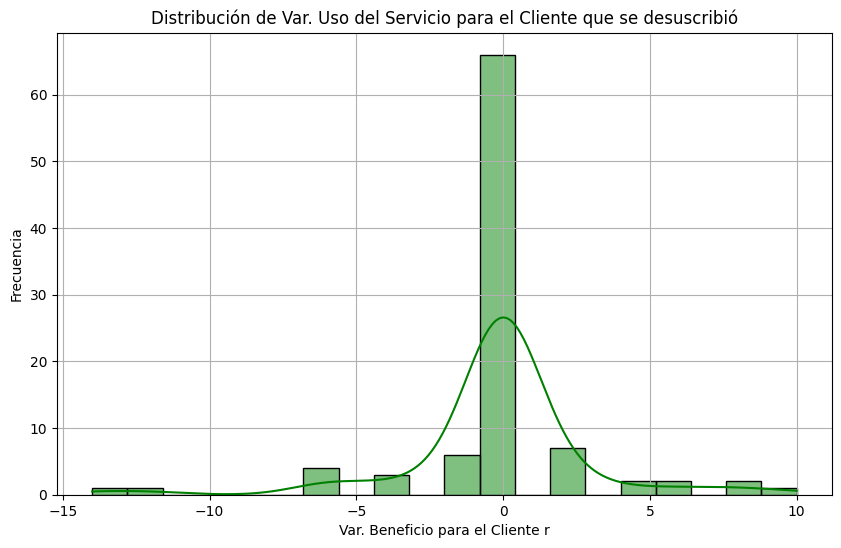

In [171]:
plt.figure(figsize=(10, 6))
sns.histplot(fugas_uno['Var. Uso del Servicio'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Distribución de Var. Uso del Servicio para el Cliente que se desuscribió')
plt.xlabel('Var. Beneficio para el Cliente r')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [158]:
fugas_cero

1917

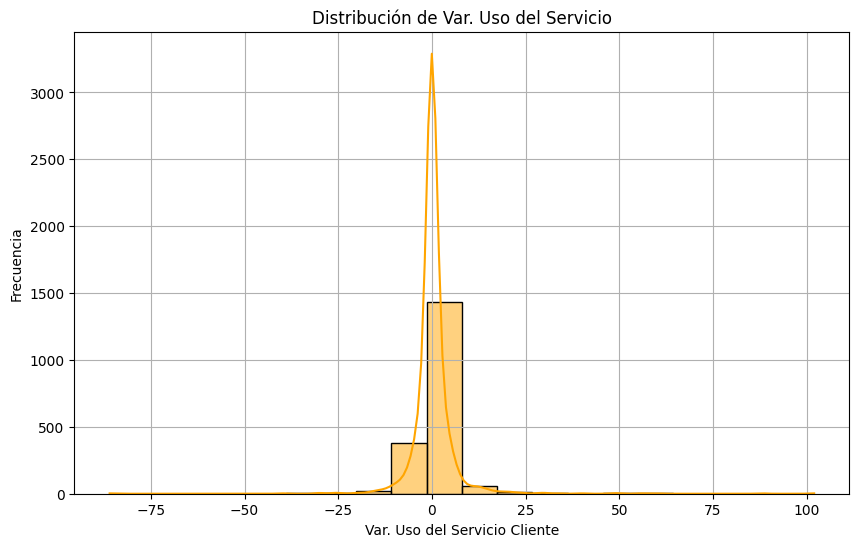

In [172]:
plt.figure(figsize=(10, 6))
sns.histplot(fugas_cero['Var. Uso del Servicio'], bins=20, kde=True, color='orange', edgecolor='black')
plt.title('Distribución de Var. Uso del Servicio')
plt.xlabel('Var. Uso del Servicio Cliente')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [179]:
print("Descripción de la var. de uso del servicio respecto a los desuscriptos: \r\n",fugas_uno['Var. Uso del Servicio'].describe())

Descripción de la var. de uso del servicio respecto a los desuscriptos: 
 count    95.000000
mean     -0.147368
std       3.118130
min     -14.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      10.000000
Name: Var. Uso del Servicio, dtype: float64


In [181]:
print("Descripción de la var. de uso del servicio respecto a los desuscriptos: \n",fugas_cero['Var. Uso del Servicio'].describe())

Descripción de la var. de uso del servicio respecto a los desuscriptos: 
 count    1917.000000
mean        0.315076
std         6.277910
min       -86.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       102.000000
Name: Var. Uso del Servicio, dtype: float64


> A priori no parece significativa la exposición del producto del cliente respecto a la fuga.

In [216]:
df = df.drop('ID',axis=1)

### Matriz de correlación

In [217]:
k = 6
corrmat = df.corr()
cols = corrmat.nlargest(k,'Fuga')['Fuga'].index

<AxesSubplot: >

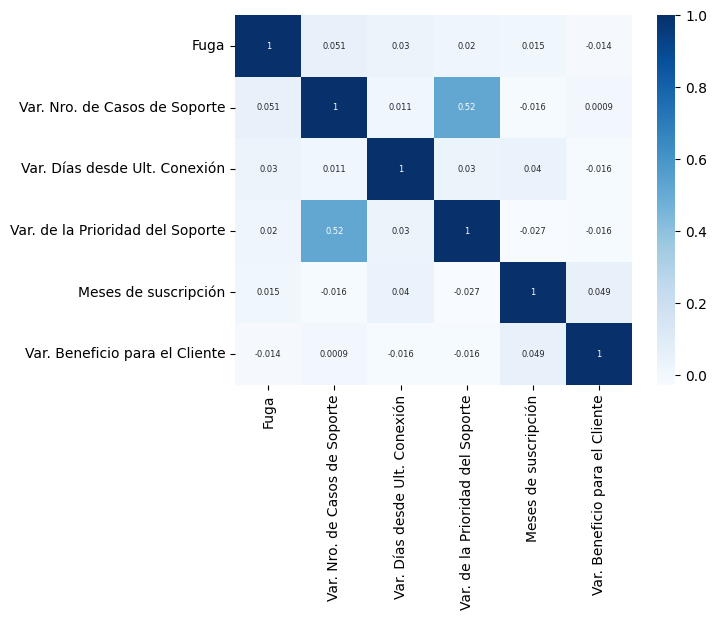

In [218]:
cm = np.corrcoef(df[cols].values.T) 
sns.heatmap(cm,annot=True, cmap='Blues', annot_kws={'size':k}, yticklabels=cols.values, xticklabels=cols.values)

Podemos tratar de normalizar las variables a ver si la escala es la que desfavorece la relación entre las variables y nuetra variable objetivo "fuga"

In [206]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [211]:
df['Índice de Satisfacción (IS)'] = scaler.fit_transform(df[['Índice de Satisfacción (IS)']])
df['Var. del IS'] = scaler.fit_transform(df[['Var. del IS']])
df['Var. Nro. Logins'] = scaler.fit_transform(df[['Var. Nro. Logins']])
df['Var. Días desde Ult. Conexión'] = scaler.fit_transform(df[['Var. Días desde Ult. Conexión']])

df

,ID,Meses de suscripción,Fuga,Índice de Satisfacción (IS),Var. del IS,Nro. de Casos de Soporte,Var. Nro. de Casos de Soporte,Prioridad del Soporte,Var. de la Prioridad del Soporte,Var. Nro. Logins,Var. Uso del Servicio,Var. Beneficio para el Cliente,Var. Días desde Ult. Conexión
0,1,134,0,0.213793,0.427152,0,0,0.0,0.0,0.240860,0,-32,1.000000
1,2,116,0,0.475862,0.380795,0,0,0.0,0.0,0.333333,0,-66,0.954345
2,3,114,0,0.620690,0.397351,2,2,3.0,3.0,0.268817,-2,1814,0.954345
3,4,112,0,0.268966,0.291391,0,0,0.0,0.0,0.225806,0,60,0.974963
4,5,110,0,0.406897,0.622517,0,0,0.0,0.0,0.251613,2,1990,0.954345
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,2008,2,0,0.000000,0.413907,0,0,0.0,0.0,0.240860,0,0,0.954345
2008,2009,2,0,0.000000,0.413907,0,0,0.0,0.0,0.240860,0,0,0.954345
2009,2010,2,0,0.000000,0.413907,0,0,0.0,0.0,0.240860,0,0,0.954345
2010,2011,2,0,0.000000,0.413907,0,0,0.0,0.0,0.240860,0,0,0.954345


In [212]:
fugas_uno = df[df['Fuga'] == 1]
fugas_uno

,ID,Meses de suscripción,Fuga,Índice de Satisfacción (IS),Var. del IS,Nro. de Casos de Soporte,Var. Nro. de Casos de Soporte,Prioridad del Soporte,Var. de la Prioridad del Soporte,Var. Nro. Logins,Var. Uso del Servicio,Var. Beneficio para el Cliente,Var. Días desde Ult. Conexión
19,20,94,1,0.000000,0.327815,0,0,0.0,0.0,0.225806,0,0,0.876289
21,22,26,1,0.420690,0.516556,12,8,3.0,0.0,0.443011,8,-2,0.941090
90,91,28,1,0.089655,0.410596,0,0,0.0,0.0,0.249462,0,-20,0.949926
98,99,24,1,0.000000,0.413907,0,0,0.0,0.0,0.240860,0,0,1.000000
104,105,26,1,0.506897,0.417219,4,4,3.0,3.0,0.292473,0,-428,0.952872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,1686,8,1,0.289655,0.493377,8,8,3.0,3.0,0.303226,6,756,0.954345
1707,1708,6,1,0.286207,0.546358,20,18,3.0,0.0,0.395699,2,2,0.957290
1749,1750,4,1,0.251724,0.655629,8,8,3.0,3.0,0.387097,4,0,0.954345
1931,1932,4,1,0.000000,0.413907,0,0,0.0,0.0,0.240860,0,0,0.954345


<AxesSubplot: >

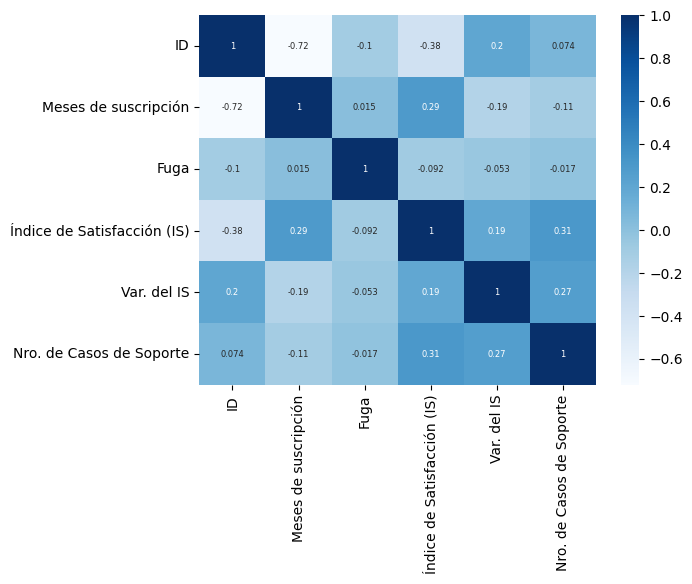

In [215]:
k = 6
corrmat = fugas_uno.corr()
cols = corrmat.nlargest(k,'Fuga')['Fuga'].index
cm = np.corrcoef(df[cols].values.T) 
sns.heatmap(cm,annot=True, cmap='Blues', annot_kws={'size':k}, yticklabels=cols.values, xticklabels=cols.values)

> Observamos a priori que la desuscripción del usuario no está explicada por las variables dispuestas en el problema. Nos queda pensar factores externos a los recolectados que puedan estar inlfuyendo en la toma de decisión de la desuscripción del cliente.